# Exploring My Tinder Data
### data downloaded early August 2019

In [4]:
import json
from datetime import datetime, timedelta
import calendar
from pytz import timezone
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Brief Note of Available Data

In [5]:
with open('my-tinder-data/data.json') as f: 
    my_data = json.load(f)

In [6]:
layer_one = my_data.keys()
print('my_data')
for key in layer_one:
    print('  └── ' + key)
    if isinstance(my_data[key], dict):
         for key2 in my_data[key]:
             print('\t└── ' + key2)

my_data
  └── Photos
  └── Spotify
	└── spotify_connected
  └── Purchases
	└── subscription
	└── consumable
	└── boost_tracking
	└── super_like_tracking
  └── Campaigns
	└── current_campaigns
	└── expired_campaigns
  └── Usage
	└── app_opens
	└── swipes_likes
	└── swipes_passes
	└── matches
	└── messages_sent
	└── messages_received
  └── Messages
  └── User
	└── active_time
	└── age_filter_max
	└── age_filter_min
	└── bio
	└── birth_date
	└── connection_count
	└── create_date
	└── education
	└── email
	└── full_name
	└── gender
	└── gender_filter
	└── interested_in
	└── interests
	└── jobs
	└── name
	└── pos
	└── schools
	└── phone_id
	└── college
  └── StudentVerifications
	└── entries


# Quick Summary of Usage

In [7]:
def find_total_usage(key_col, to_print=False):
    total = 0
    for key, val in my_data['Usage'][key_col].items():
        total += val
    if to_print:
        print("Total " + key_col + ": " + str(total))
    else:
        return total

In [8]:
for item in my_data['Usage']:
    find_total_usage(item, True)

Total app_opens: 2687
Total swipes_likes: 1110
Total swipes_passes: 1791
Total matches: 672
Total messages_sent: 1146
Total messages_received: 2262


# More Detailed Look at Usage

In [9]:
usage_dict = {}
for item in my_data['Usage']:
    for key in my_data['Usage'][item]:
        usage_dict[key] = []

topic_lst = []
for topic in my_data['Usage']:
    for date in usage_dict:
        if date in my_data['Usage'][topic].keys():
            usage_dict[date].append(int(my_data['Usage'][topic][date]))
        else:
            usage_dict[date].append(0)
    topic_lst.append(topic)

In [10]:
def get_month_day_dow(dataframe, date_col):
    '''
    Converts a date column into three columms of month (str),
    day (int) and day of week ('dow'; str).
    
    Inputs:
        dataframe: a pandas dataframe
        data_col (str): name of date column
    
    Outputs: a pandas dataframe with three additional columns
    '''
    dataframe['month'] = dataframe[date_col].dt.month.apply(lambda x: calendar.month_name[x])
    dataframe['day'] = dataframe[date_col].dt.day
    dataframe['dow'] = dataframe[date_col].dt.weekday_name.str.slice(stop=3)
    return dataframe

In [11]:
dates_df = pd.DataFrame(usage_dict)
cols_d = {key: val for (key, val) in zip(dates_df.T.columns, topic_lst)}
use_df = dates_df.T.rename(columns=cols_d).reset_index().rename(columns={'index': 'date'})
use_df['date'] = pd.to_datetime(use_df['date'])
use_df = use_df[use_df['date'] > datetime.strptime('2018-08-01', '%Y-%m-%d')]
use_df = get_month_day_dow(use_df, 'date')
use_df.head()

,date,app_opens,swipes_likes,swipes_passes,matches,messages_sent,messages_received,month,day,dow
21,2018-08-25,160,51,22,22,136,263,August,25,Sat
22,2018-08-26,14,10,11,5,5,13,August,26,Sun
23,2018-08-27,9,14,11,6,0,4,August,27,Mon
24,2018-08-28,46,61,45,26,16,20,August,28,Tue
25,2018-08-29,193,56,40,24,109,160,August,29,Wed


In [12]:
melted_use = pd.melt(use_df, id_vars=['date', 'month', 'day', 'dow'])
melted_use.head()

,date,month,day,dow,variable,value
0,2018-08-25,August,25,Sat,app_opens,160
1,2018-08-26,August,26,Sun,app_opens,14
2,2018-08-27,August,27,Mon,app_opens,9
3,2018-08-28,August,28,Tue,app_opens,46
4,2018-08-29,August,29,Wed,app_opens,193


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


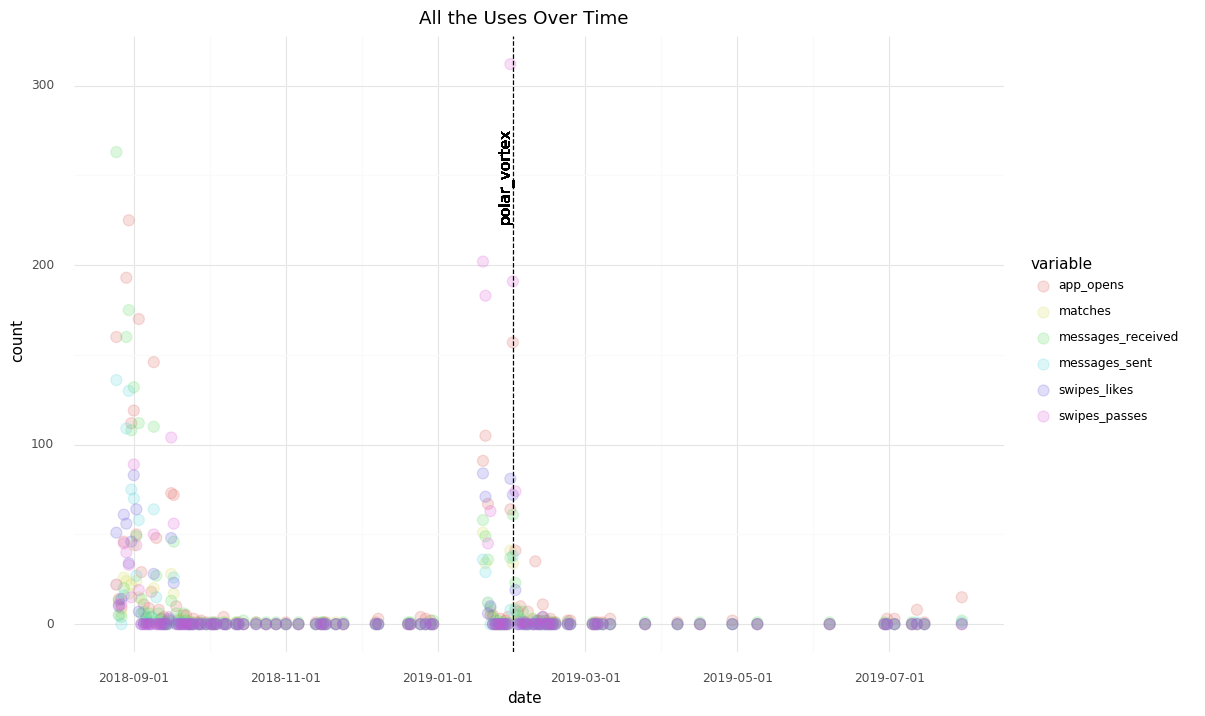

<ggplot: (307290800)>

In [36]:
polar_v = datetime.strptime('2019-01-31', '%Y-%m-%d')
polar_vortex = 'polar_vortex'
p9.ggplot(melted_use, p9.aes('date', 'value', col='variable')) + \
    p9.geom_point(p9.aes(color='variable'), alpha=0.2, size=4) + p9.theme_minimal() + \
    p9.geom_vline(xintercept=polar_v, linetype='dashed') + \
    p9.theme(figure_size=(12, 8)) + \
    p9.geom_text(p9.aes(x=(polar_v + timedelta(days=-3)), label=polar_vortex, y=250),
                 angle=90) + p9.ggtitle('All the Uses Over Time') + p9.ylab('count')

In [14]:
# Matched w/ current s.o. (we had met previously in person)
daydayday = datetime.strptime(my_data['Messages'][0]['messages'][0]['sent_date'][5:16], '%d %b %Y')
total_days =  daydayday - datetime.strptime(min(my_data['Usage']['app_opens'],
                                                key=my_data['Usage']['app_opens'].get), '%Y-%m-%d')
print(f"Num days w/ app til \"meet\" SUPER CUTE: {total_days.days}!!!!")

Num days w/ app til "meet" SUPER CUTE: 473!!!!


# Message Analysis
#### (this was the most detailed section in the dataset)

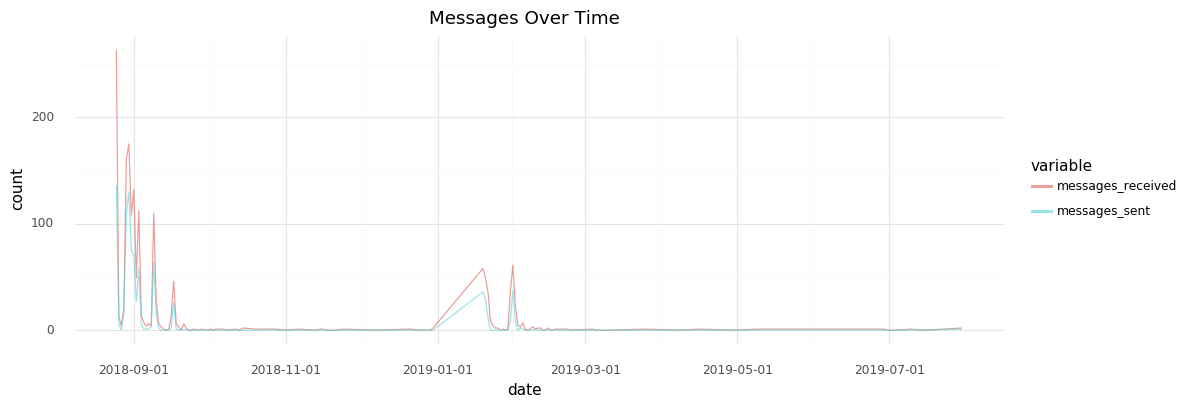

<ggplot: (308678611)>

In [37]:
melted_messages = melted_use[melted_use['variable'].isin(['messages_sent', 'messages_received'])]
p9.ggplot(melted_messages, p9.aes('date', 'value', col='variable')) + \
    p9.geom_line(p9.aes(color='variable'), alpha=0.6) + p9.theme_minimal()+ \
    p9.theme(figure_size=(12, 4)) + p9.ggtitle('Messages Over Time') + p9.ylab('count')

In [16]:
count = 0
for message in my_data['Messages']:
    if not message['messages']:
        count += 1
print("Number of Unrequited Initial Buddings of Love: {}".format(count))
print("Probability I would actually respond to a first message: {:.2f}%". \
      format(count / len(my_data['Messages']) * 100))
print("¯\_(ツ)_/¯")

Number of Unrequited Initial Buddings of Love: 165
Probability I would actually respond to a first message: 53.05%
¯\_(ツ)_/¯


Notes on the stats above:
* Each conversation with an individual match is a dictionary with two keys: match number and messages. The value for messages is a list with only the text of the messages a user sent (not the text of the messages receivded). Therefore, I took any converation with an empty list as the value for messages to mean that I was messaged first but never responded, e.g.: {'match_id': 'Match 307', 'messages': []}
* By "first message", I do not distinguish between conversations in which initiated by the match and conversations I initiated.

In [17]:
message_d = {'num_words': [], 'date': []}
for messenger in my_data['Messages']:
    convo = messenger['messages']
    for i in range(len(convo)):
        message_d['num_words'].append(len(convo[i]['message'].split()))
        message_d['date'].append(datetime.strptime(convo[i]['sent_date'][5:-4],
                                                   '%d %b %Y %H:%M:%S'). \
                                 replace(tzinfo=timezone('GMT')))
message_df = pd.DataFrame(message_d)
message_df['time'] = message_df['date'].apply(lambda x: x.astimezone('US/Central').time())
message_df['date'] = message_df['date'].apply(lambda x: x.astimezone('US/Central').date())
message_df['hour'] = message_df['time'].apply(lambda x: x.hour)
message_df['tod'] = pd.cut(message_df['hour'], bins=[6, 12, 17, 23],
                    labels=['morning','afternoon','night'])
message_df['tod'] = message_df['tod'].astype('str').replace('nan', 'late_night')
message_df['date'] = pd.to_datetime(message_df['date'])
message_df = get_month_day_dow(message_df, 'date')
message_df['weekday'] = ~message_df['dow'].isin(['Fri', 'Sat', 'Sun'])
message_df.head()

,num_words,date,time,hour,tod,month,day,dow,weekday
0,11,2019-01-30,19:54:58,19,night,January,30,Wed,True
1,26,2019-01-31,10:50:16,10,morning,January,31,Thu,True
2,7,2019-01-31,10:50:37,10,morning,January,31,Thu,True
3,23,2019-01-31,18:43:21,18,night,January,31,Thu,True
4,28,2019-01-31,18:45:24,18,night,January,31,Thu,True


### Below, we can see the how many  messages I am sending for each day of the week. The y-axis reflects the raw number of messages while the label above each bar represents the messages sent that day as a percentage of the total week.

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


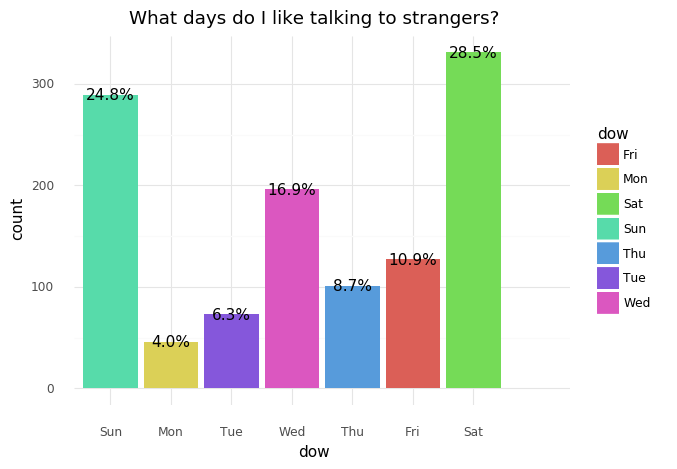

<ggplot: (-9223372036550716626)>

In [18]:
p9.ggplot(message_df, p9.aes('dow', fill='dow')) + p9.geom_bar() + \
    p9.geom_text(p9.aes(label='stat(prop)*100', group=1),
                 stat='count', format_string='{:.1f}%') + \
    p9.scale_x_discrete(limits=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) + \
    p9.theme_minimal() + p9.ggtitle('What days do I like talking to strangers?')

### Message Time Analysis
#### The next few plots analyze the time of day in which messages were sent.

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


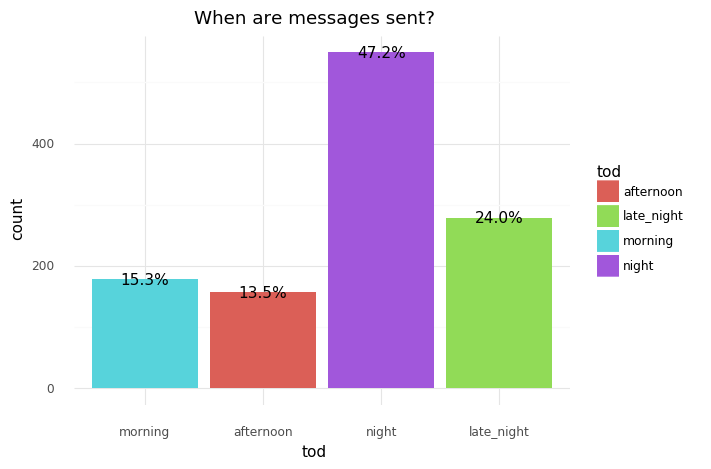

<ggplot: (306743444)>

In [19]:
p9.ggplot(message_df, p9.aes('tod', fill='tod')) + p9.geom_bar() + \
    p9.geom_text(p9.aes(label='stat(prop)*100', group=1),
                 stat='count', format_string='{:.1f}%') + \
    p9.scale_x_discrete(limits=['morning', 'afternoon', 'night', 'late_night']) + \
    p9.theme_minimal() + p9.ggtitle('When are messages sent?')

#### Bins:
* Morning 6:00:01 - 12:00:00
* Afternoon 12:00:01 - 17:00:00
* Night 17:00:01 - 23:00:00
* Late Night 23:00:01 - 6:00:00

Binned according to my personal schedule and my personal judgement of my schedule

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:430: UserWarning: position_stack : Removed 6 rows containing missing values.
  data = self.position.setup_data(self.data, params)


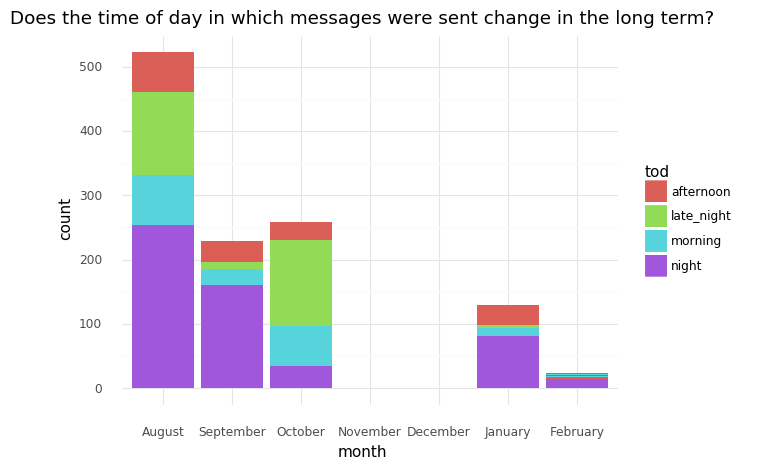

<ggplot: (308106195)>

In [38]:
melted_month = message_df.groupby(['month', 'tod']).agg({'dow': 'count'}).unstack(). \
                          reset_index().melt(id_vars=['month'])
p9.ggplot(melted_month, p9.aes(x='month', y='value', fill='tod')) + p9.geom_col() + \
    p9.scale_x_discrete(limits=['August', 'September', 'October', 'November', 'December',
                                'January', 'February']) + p9.theme_minimal() + \
    p9.ggtitle('Does the time of day in which messages were sent change in the long term?') + \
    p9.ylab('count')

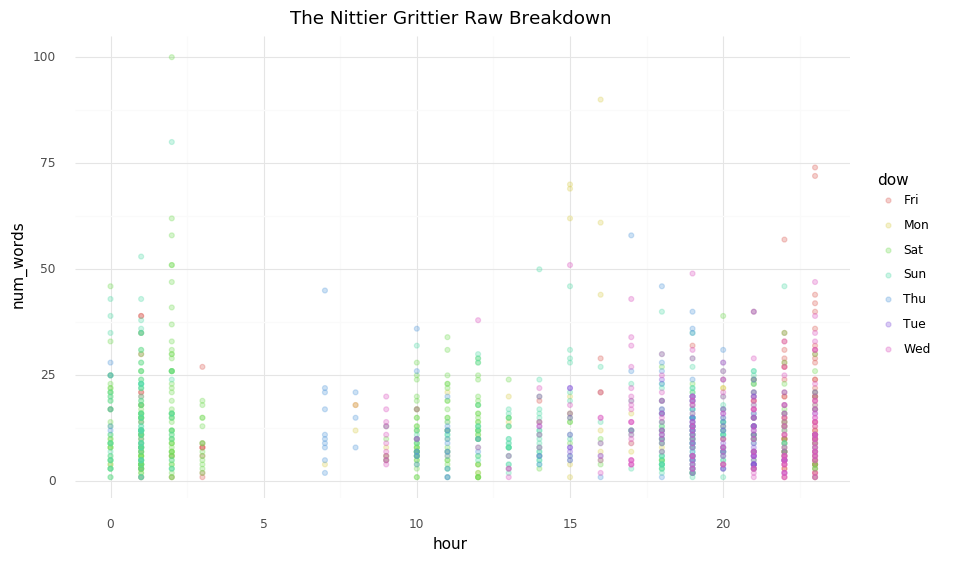

<ggplot: (307322646)>

In [21]:
p9.ggplot(message_df, p9.aes('hour', 'num_words')) + \
    p9.geom_point(p9.aes(color='dow'), alpha=0.3) + \
    p9.theme_minimal() + p9.theme(figure_size=(10, 6)) + \
    p9.ggtitle('The Nittier Grittier Raw Breakdown')  

### The plot below looks at what hours I sent messages by each day of the week

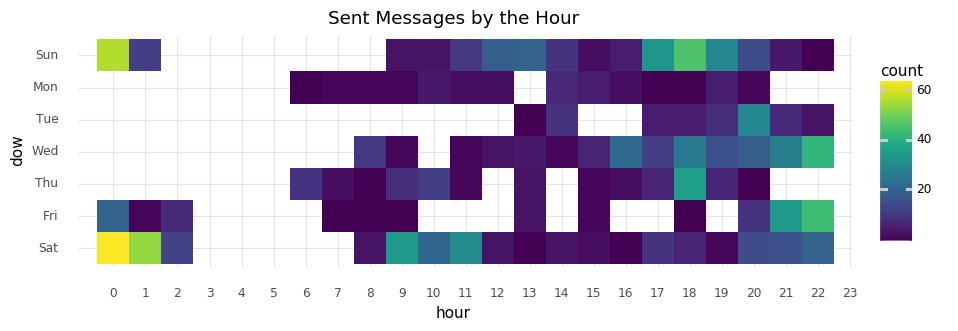

<ggplot: (-9223372036550820078)>

In [22]:
p9.ggplot(message_df) + p9.aes('hour', 'dow') + p9.geom_bin2d(bins=24) + \
    p9.scale_y_discrete(limits=['Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon', 'Sun']) + \
    p9.scale_x_discrete(breaks=np.arange(0, 24), limits=np.arange(0, 24)) + \
    p9.ggtitle('Sent Messages by the Hour') + p9.theme_minimal() + \
    p9.theme(figure_size=(10, 3)) 

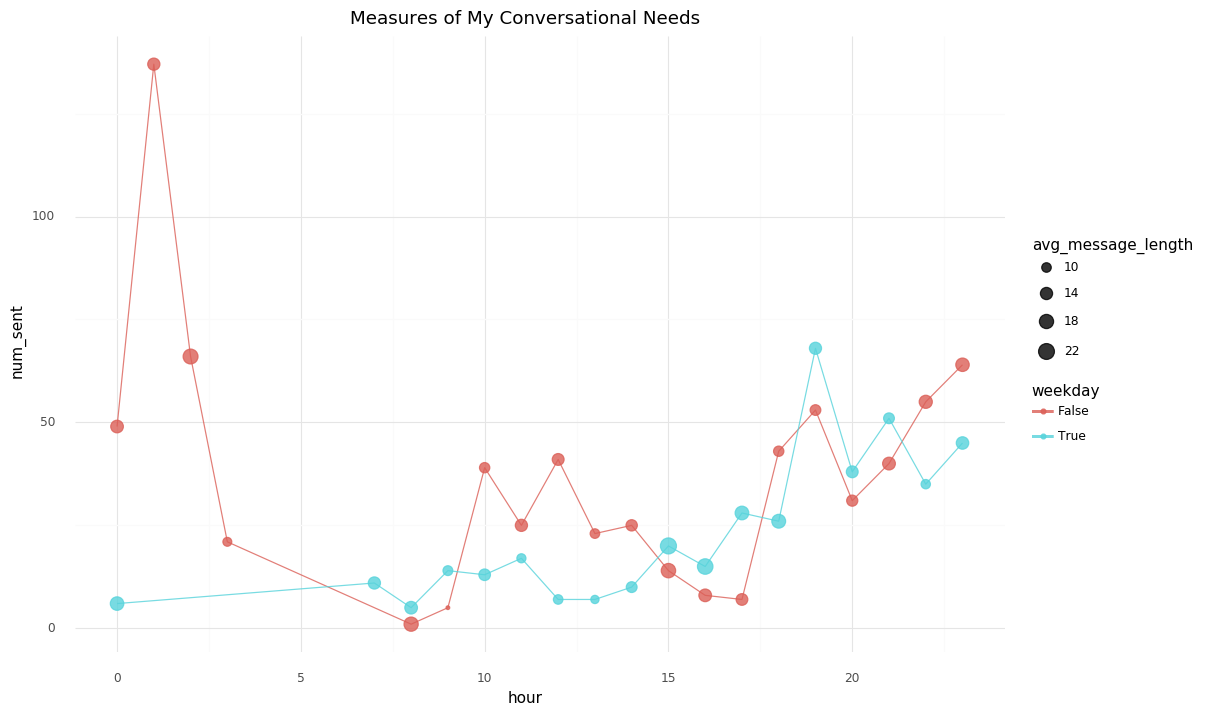

<ggplot: (307326447)>

In [23]:
messages_grouped = message_df.groupby(['hour', 'weekday'])['num_words'].agg(['mean', 'count']).reset_index()
melted_messages = pd.melt(messages_grouped, id_vars=['hour', 'mean', 'count']). \
                     rename(columns={'value':'weekday', 'count': 'num_sent',
                                     'mean': 'avg_message_length'})
p9.ggplot(melted_messages, p9.aes('hour', 'num_sent')) + \
    p9.geom_point(p9.aes(color='weekday', size='avg_message_length'), alpha=0.8) + \
    p9.geom_line(p9.aes(color='weekday'), alpha=0.8) + p9.theme_minimal() + \
    p9.theme(figure_size=(12, 8)) + p9.ggtitle('Measures of My Conversational Needs')

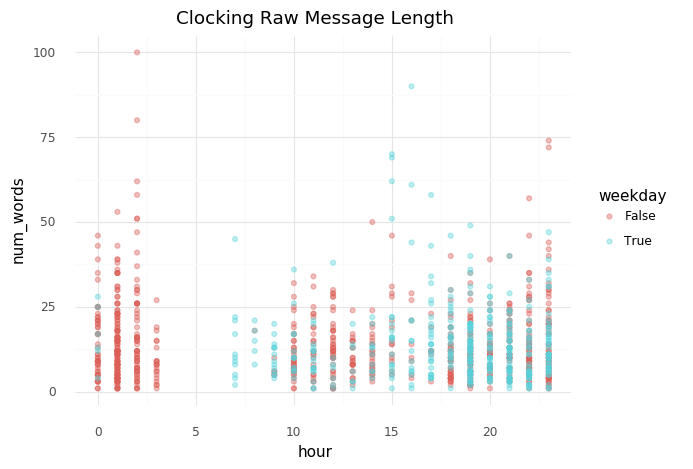

<ggplot: (306765253)>

In [24]:
p9.ggplot(message_df, p9.aes('hour', 'num_words')) + \
    p9.geom_point(p9.aes(color='weekday'), alpha=0.4) + \
    p9.theme_minimal() + p9.ggtitle('Clocking Raw Message Length')

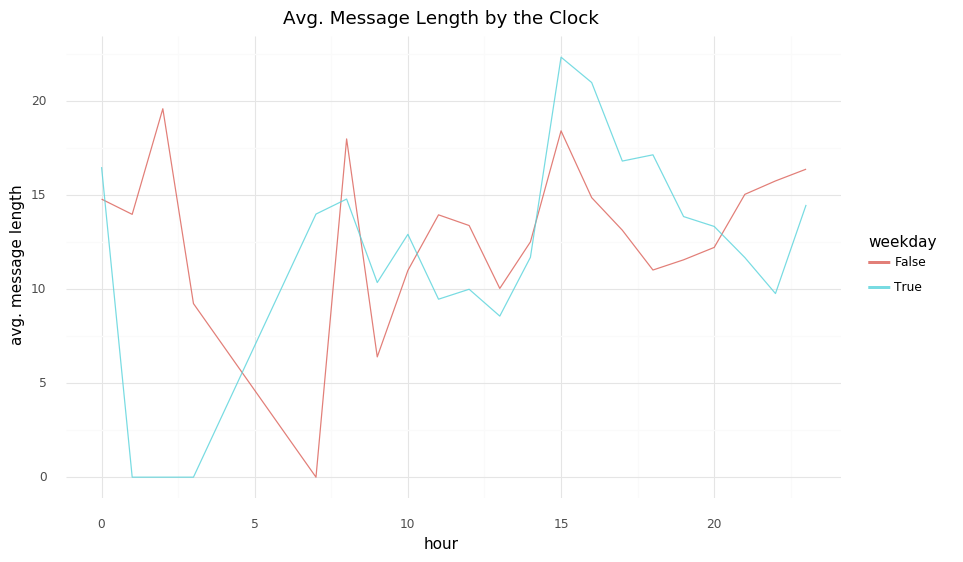

<ggplot: (306255522)>

In [41]:
melted_by_dt = pd.melt(message_df.groupby(['hour', 'weekday'])['num_words'].mean().unstack(). \
                       reset_index().fillna(0), id_vars=['hour'])
p9.ggplot(melted_by_dt, p9.aes('hour', 'value')) + \
    p9.geom_line(p9.aes(color='weekday'), alpha=0.8) + \
    p9.theme_minimal() + p9.theme(figure_size=(10, 6)) + \
    p9.ggtitle('Avg. Message Length by the Clock') + p9.ylab('avg. message length')

In [26]:
messages_by_hr = message_df.groupby('hour').agg({'num_words': 'mean', 'tod': 'count'}). \
                            rename({'tod': 'count'}, axis=1).reset_index()
hours = pd.DataFrame(np.arange(0, 25)).rename({0: 'hour'}, axis=1)
total_hours = pd.merge(hours, messages_by_hr, on='hour', how='left').fillna(0)

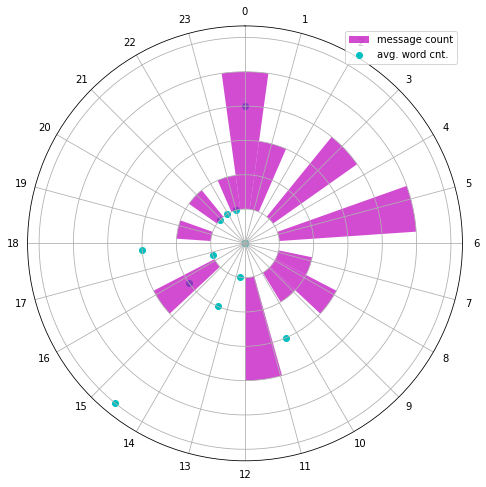

In [27]:
theta = np.linspace(0.0, 2 * np.pi, 23, endpoint=False)
radii, _ = np.histogram(total_hours['count'], bins = 23)
radii2, _ = np.histogram(total_hours['num_words'], bins = 23)
bar_width = (2*np.pi) / 23
plt.figure(figsize = (12, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=bar_width, bottom=1, alpha=0.7, color='m')
points = ax.scatter(theta, radii2, alpha=1, color='c')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))
plt.legend([bars, points],['message count', 'avg. word cnt.'])
plt.show()

In [28]:
by_date = get_month_day_dow(use_df.groupby('date').sum().reset_index(), 'date')
relevant = by_date[(by_date['app_opens'] > 0) | (by_date['matches'] > 0)]
relevant = relevant[(relevant['date'].dt.month > 7) | (relevant['date'].dt.month < 3)]

# Calendars

### Because it's been roughly one year since I started activately using tinder on a semi-regular basis, below I create two calendars of this year (Aug 2018 - Aug 2019)

#### The calendar below maps number of times the app (number inside dot) was opened to the number of matches (color of dots) and does not include days in which neither event occurred.

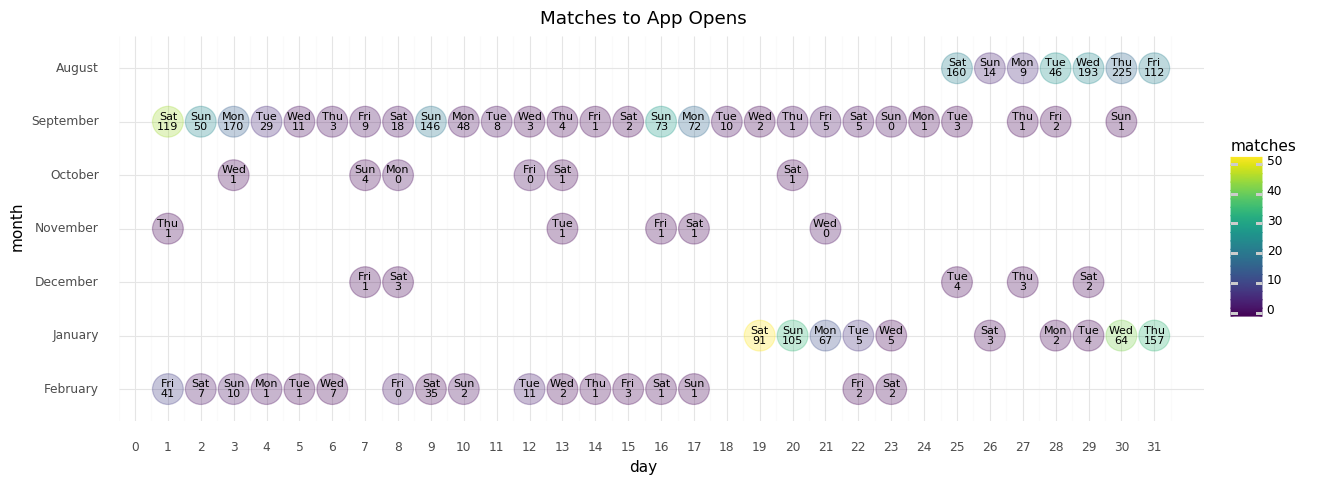

<ggplot: (308127566)>

In [29]:
#inspired by https://chichacha.netlify.com/2018/05/26/making-calendar-with-ggplot-moon-phase-calendar/
p9.ggplot(relevant, p9.aes(x="day", y="month")) + p9.theme_minimal() + \
    p9.scale_x_continuous(breaks=np.arange(0, 32)) + \
    p9.geom_point(p9.aes(color='matches'), alpha=0.3, size=12) + \
    p9.geom_text(p9.aes(label="app_opens"), va='top', size=8) + p9.theme(figure_size=(14, 5)) + \
    p9.geom_text(p9.aes(label='dow'), size=8, va='bottom') + \
    p9.scale_y_discrete(limits=['February', 'January', 'December', 'November', 'October',
                                'September', 'August']) + \
    p9.labs(title="Matches to App Opens")

#### The calendar below tracks only app opens with both color and number of the day's dot.
Unlike the calendar above, every date is filled in whether an "event" occurred or not.

In [30]:
# This fills in any empty dates
dates = pd.DataFrame(pd.date_range('2018-08-25', '07-24-2019')).rename({0: 'date'}, axis=1)
total_dates = pd.merge(dates, by_date, on='date', how='left')
int_cols = [] 
for col in total_dates.columns:
    if total_dates[col].dtype == 'float64' and col != 'day':
        int_cols.append(col)
total_dates[int_cols] = total_dates[int_cols].fillna(0).astype('int')
total_dates = get_month_day_dow(total_dates, 'date')
total_dates.head()

,date,app_opens,swipes_likes,swipes_passes,matches,messages_sent,messages_received,day,month,dow
0,2018-08-25,160,51,22,22,136,263,25,August,Sat
1,2018-08-26,14,10,11,5,5,13,26,August,Sun
2,2018-08-27,9,14,11,6,0,4,27,August,Mon
3,2018-08-28,46,61,45,26,16,20,28,August,Tue
4,2018-08-29,193,56,40,24,109,160,29,August,Wed


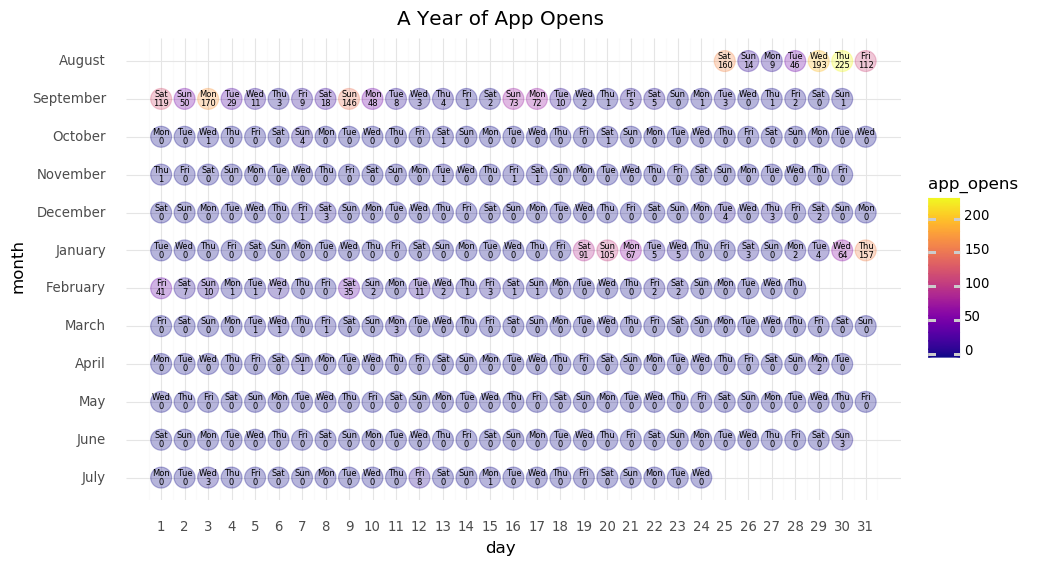

<ggplot: (308703159)>

In [31]:
p9.ggplot(total_dates, p9.aes(x="day", y="month")) + p9.theme_minimal(base_size=12) + \
    p9.scale_x_continuous(breaks=np.arange(1, 32)) + \
    p9.geom_point(p9.aes(color='app_opens'), alpha=0.3, size=8) + \
    p9.geom_text(p9.aes(label="app_opens"), va='top', size=6) + p9.theme(figure_size=(10, 6)) + \
    p9.geom_text(p9.aes(label='dow'), size=6, va='bottom') + \
    p9.scale_y_discrete(limits=['July', 'June', 'May', 'April', 'March', 'February', 'January',
                                'December', 'November', 'October', 'September', 'August']) + \
    p9.labs(title="A Year of App Opens") + p9.scale_color_cmap('plasma')